<a href="https://colab.research.google.com/github/Laaliji/Image_processing_and_computer_vision_workshops/blob/main/morphological_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

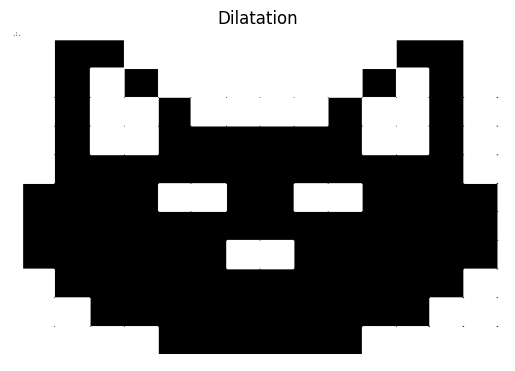

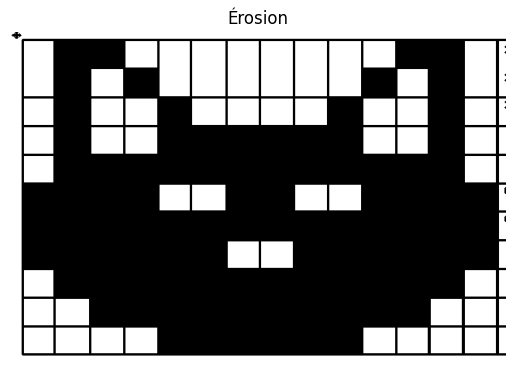

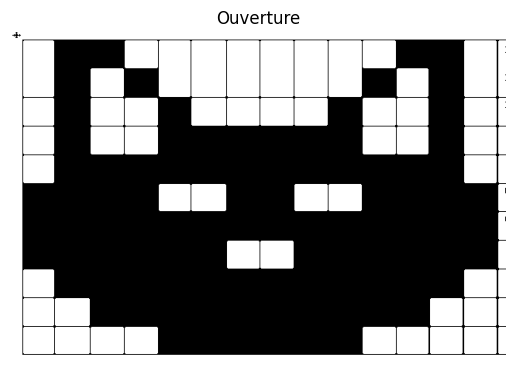

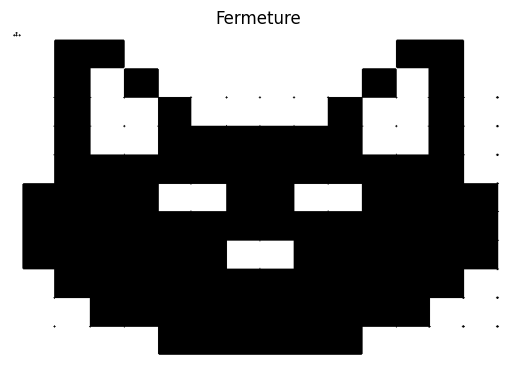

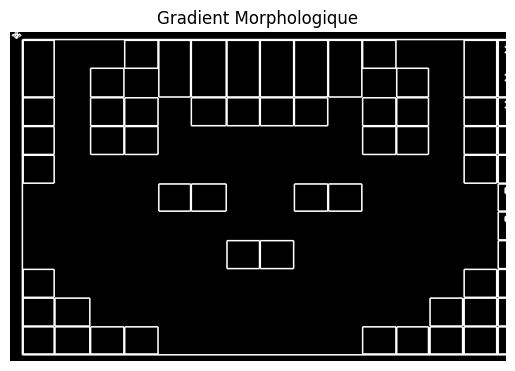

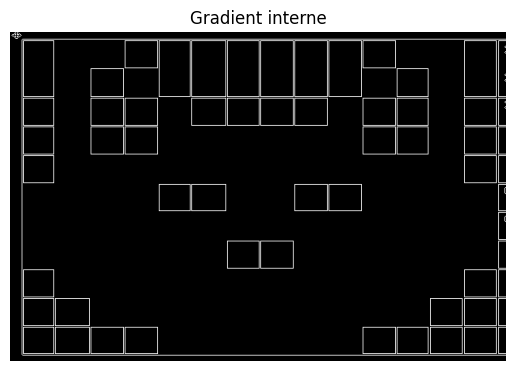

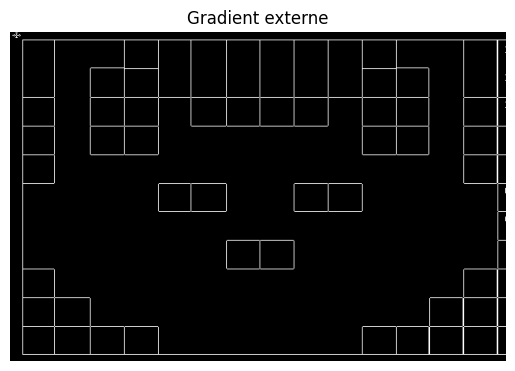

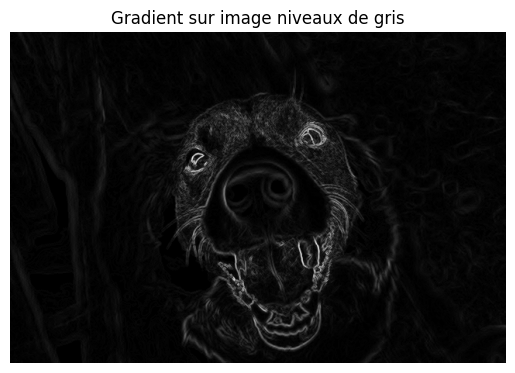

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Affichage facilitant la comparaison
def show(title, img):
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Chargement d’une image binaire
binary_img = cv2.imread('binary.jpg', cv2.IMREAD_GRAYSCALE)
grayscale_img = cv2.imread('grayscale.png', cv2.IMREAD_GRAYSCALE)

# Binarisation si besoin
_, binary_img = cv2.threshold(binary_img, 127, 255, cv2.THRESH_BINARY)

# Élément structurant (croix 3x3)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# 1. DILATATION
dilated = cv2.dilate(binary_img, kernel)
show("Dilatation", dilated)

# 2. EROSION
eroded = cv2.erode(binary_img, kernel)
show("Érosion", eroded)

# 3. OUVERTURE = Érosion suivie de Dilatation
opened = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
show("Ouverture", opened)

# 4. FERMETURE = Dilatation suivie de Érosion
closed = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)
show("Fermeture", closed)

# 5. GRADIENT MORPHOLOGIQUE = Dilatation - Érosion
gradient = cv2.morphologyEx(binary_img, cv2.MORPH_GRADIENT, kernel)
show("Gradient Morphologique", gradient)

# 6. Gradient interne et externe
internal_gradient = cv2.subtract(binary_img, eroded)
show("Gradient interne", internal_gradient)

external_gradient = cv2.subtract(dilated, binary_img)
show("Gradient externe", external_gradient)

# 7. Bonus – Appliquer les mêmes opérations à une image en niveaux de gris
gray_dilated = cv2.dilate(grayscale_img, kernel)
gray_eroded = cv2.erode(grayscale_img, kernel)
gray_gradient = cv2.subtract(gray_dilated, gray_eroded)
show("Gradient sur image niveaux de gris", gray_gradient)
